# What it takes to Raise the Big Bucks in the Startup World

<img src="files/Biz_Plan_Comic.png" width=700em>

The startup world is filled with rumors and fads (see https://pixelastic.github.io/pokemonorbigdata/). In this project, we hope to look into some of these underlying trends, and maybe come out with a few predictors on what it takes to be successful.

Paul Graham, a famous venture capitalist and founder of arguably the most renowned startup incubator Y-Combinator, once became infamous for his comments on what makes a poor start-up, saying,
"One quality that's a really bad indication is a CEO with a strong foreign accent."
The trouble he stirred up caused him a huge headache, and he later wrote a whole essay justifying himself, found here: http://paulgraham.com/accents.html .

In Silicon Valley, that's only the tip of the iceberg. There are dozens of movements to bring greater diversity to the workplace, with constant murmurs of the underlying biases against sexes, races, sexual orientation, and more. Sometimes, there are cold-hard facts backing up these claims, but often the data just isn't there and we need to fall back on anecdotal evidence. Can we sympathize? Absolutely. But can we form a confident opinion on the matter? No necessarily.

In this project, we hope to take some publicly available data on the startup world and find what biases exist with the community. If nothing, the analyses we will do here will give rise to 


# Getting the data, fixing it

The code below encapsulates the massaging done to the data to better fit our later models. Code is commented where necessary, and is completely commented out when it was used for debugging purposes only.

In [327]:
%matplotlib inline
import numpy as np, scipy as sp, pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

In [318]:
rounds_df = pd.read_excel('crunchbase_export.xlsx', sheetname='Rounds')

In [66]:
print rounds_df.columns
print rounds_df.head(5)
#Quick look at the data
#print len(rounds_df.index)

Index([u'company_permalink', u'company_name', u'company_category_list',
       u'company_market', u'company_country_code', u'company_state_code',
       u'company_region', u'company_city', u'funding_round_permalink',
       u'funding_round_type', u'funding_round_code', u'funded_at',
       u'funded_month', u'funded_quarter', u'funded_year',
       u'raised_amount_usd'],
      dtype='object')
                 company_permalink          company_name  \
0  /organization/bratpackstyle-llc  #BratPackStyle, LLC.   
1              /organization/-fame                 #fame   
2            /organization/hashoff              #HASHOFF   
3            /organization/hashoff              #HASHOFF   
4            /organization/waywire              #waywire   

                               company_category_list   company_market  \
0  |Lifestyle|Content Discovery|Social Commerce|R...  Social Commerce   
1                                            |Media|            Media   
2              |Digital M

In [67]:
#rounds_df.dtypes #Checking the datatypes

# Basics

There are some important considerations we should have if we want to do some proper data science with our data. First, let's try some initial plotting.

Intuitively, if we want to consider the most successful startups, to get a feeling for the data, we might want to plot the companies that raised the most money in their funding rounds.

BUT

Different kinds of startups have different funding round considerations. A biotech startup might need much more money if they are need biotech hardware for their product; on the other hand, a software startup might be able to make a smaller amount of money much farther. 

With this consideration, we begin by focusing on grouping by the comapny categories and seeing how the funding varies.

In [320]:
# Fix categories to be in a better python format
rounds_df.company_category_list = rounds_df.company_category_list.apply(lambda x: str(x).strip('|').split('|'))

In [69]:
avg_cat_funds = {k: np.mean(v) for k, v in cat_funds.iteritems()}
std_cat_funds = {k: np.std(v) for k, v in cat_funds.iteritems()}
print avg_cat_funds['Utility Land Vehicles'] # Average for this category
print std_cat_funds['Utility Land Vehicles'] # Standard deviation for thsi category
print cat_funds['Utility Land Vehicles'] #All funding

47800000.0
58186596.3947
[130000000.0, 3400000.0, 10000000.0]


In [70]:
# Get top 20 categories, ranked by average funding from funding rounds
from collections import Counter
ctr = Counter(avg_cat_funds)
avg_cat_funds_sub = ctr.most_common(20)
print avg_cat_funds_sub
std_cat_funds_sub = [(entry[0], std_cat_funds[entry[0]]) for entry in avg_cat_funds_sub]
print std_cat_funds_sub

[('Animal Feed', 324729205.69999999), ('Limousines', 307244133.39130437), ('Distributors', 167882103.22580644), ('Film Production', 93848738.299999997), ('Natural Gas Uses', 84135280.0), ('RIM', 81726219.615384609), ('Hi Tech', 78000000.0), ('Space Travel', 72479522.166666672), ('Oil and Gas', 69759489.724999994), ('Cable', 68629170.599999994), ('Local Commerce', 68140951.35294117), ('Wind', 63257077.136363633), ('Banking', 54335876.282527879), ('Coworking', 53620115.549999997), ('Debt Collecting', 52758887.0), ('Concentrated Solar Power', 52224761.200000003), ('Natural Resources', 50987212.191489361), ('B2B Express Delivery', 50920377.888888888), ('Oil & Gas', 50353777.58730159), ('Utility Land Vehicles', 47800000.0)]
[('Animal Feed', 958469552.45563769), ('Limousines', 498152014.099985), ('Distributors', 817320105.10083127), ('Film Production', 201094078.54073766), ('Natural Gas Uses', 157965563.85067475), ('RIM', 265204502.42191657), ('Hi Tech', 0.0), ('Space Travel', 226241830.4255

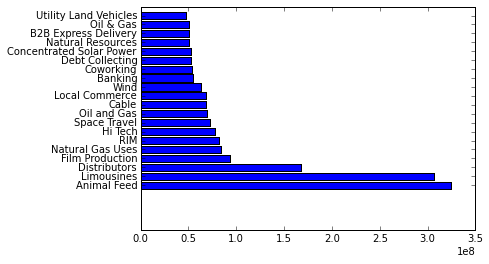

In [71]:
#xerr = [i[1] for i in std_cat_funds_sub]
plt.barh(range(len(avg_cat_funds_sub)), [i[1] for i in avg_cat_funds_sub],  align='center');
plt.yticks(range(len(avg_cat_funds_sub)), [i[0] for i in avg_cat_funds_sub]);

Standard deviations are NOT plotted above, because they were found to be far too large to encapsulate any useful information. This is because our data isn't typical --- often, the best-funded startups happen because one single funding round works phenomenally well. This is clear from the data above for Utility Land Vehicle startups, where there are only 3 listed funding rounds, but one round dwarfs the other by more than an order of magnitude.|

In [72]:
#rounds_df['Animal Feed' in rounds_df.company_category_list]
rounds_df[rounds_df.company_category_list.apply(lambda x : 'Animal Feed' in x)]

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
529,/organization/4-animals-alsterscience-gmbh,4 Animals AlsterScience GmbH,"[Medical, Specialty Foods, Animal Feed]",Medical,DEU,NaN,Hamburg,Hamburg,/funding-round/537e4bdbdccf88368b78f0ab4e3d518b,venture,NaN,2014-10-10,2014-10,2014-Q4,2014,NaN
4013,/organization/algal-scientific,Algal Scientific,"[Nutraceutical, Animal Feed, Water, Clean Tech...",Clean Technology,USA,MI,Detroit,Plymouth,/funding-round/5b5abea3a0bdc569ba538d6818235228,grant,NaN,2009-03-23,2009-03,2009-Q1,2009,65000
4014,/organization/algal-scientific,Algal Scientific,"[Nutraceutical, Animal Feed, Water, Clean Tech...",Clean Technology,USA,MI,Detroit,Plymouth,/funding-round/a632995db4ddc3fd7b98f409aff8f945,venture,NaN,2014-04-28,2014-04,2014-Q2,2014,3000000
4015,/organization/algal-scientific,Algal Scientific,"[Nutraceutical, Animal Feed, Water, Clean Tech...",Clean Technology,USA,MI,Detroit,Plymouth,/funding-round/ed26d7ccd47edaedebc7bb39efa5264b,venture,B,2015-03-31,2015-03,2015-Q1,2015,7000000
4016,/organization/algal-scientific,Algal Scientific,"[Nutraceutical, Animal Feed, Water, Clean Tech...",Clean Technology,USA,MI,Detroit,Plymouth,/funding-round/9d1fbb4f5e997175971a112c75181a5a,venture,NaN,2009-11-12,2009-11,2009-Q4,2009,NaN
4017,/organization/algal-scientific,Algal Scientific,"[Nutraceutical, Animal Feed, Water, Clean Tech...",Clean Technology,USA,MI,Detroit,Plymouth,/funding-round/0b481adc66ef0d407f6f07775a49b746,venture,NaN,2012-11-29,2012-11,2012-Q4,2012,NaN
15139,/organization/camera-agroalimentos,Camera Agroalimentos,"[Distribution, Animal Feed, Agriculture]",Distribution,BRA,NaN,BRA - Other,Timbaúba,/funding-round/762985cd4ead69f680be1303b446d5e3,private_equity,NaN,2010-12-22,2010-12,2010-Q4,2010,32407045
18909,/organization/cleverpet,CleverPet,"[Animal Feed, Services, Pets]",Animal Feed,USA,CA,San Diego,San Diego,/funding-round/dd04cb8813a49e1d2f8182e6dea3b4bc,seed,NaN,2015-06-05,2015-06,2015-Q2,2015,120000
19907,/organization/cofco,COFCO,"[Agriculture, Biotechnology, Animal Feed]",Animal Feed,CHN,NaN,CHN - Other,NaN,/funding-round/7f059d8196942eef754fbc859b5f306f,debt_financing,NaN,2014-02-22,2014-02,2014-Q1,2014,3200000000
32867,/organization/first-choice-pet-care,First Choice Pet Care,[Animal Feed],Animal Feed,USA,TX,Austin,Austin,/funding-round/3b31d3a66887aad44c7ded40b6398dc1,angel,NaN,2014-06-18,2014-06,2014-Q2,2014,4600000


As that was a letdown, let's at least take the data for which we have a lot of funding rounds, and hopefully the better-averaged data can help us see the trends we are interested in. 

In [77]:
#rounds_df.groupby(["company_category_list"])["company_permalink"].nunique()>100

company_permalink                            /organization/bratpackstyle-llc
company_name                                            #BratPackStyle, LLC.
company_category_list      [Lifestyle, Content Discovery, Social Commerce...
company_market                                               Social Commerce
company_country_code                                                     USA
company_state_code                                                        NY
company_region                                                 New York City
company_city                                                        New York
funding_round_permalink      /funding-round/7f52613bbda1edcaed3844d806d62757
funding_round_type                                                      seed
funding_round_code                                                       NaN
funded_at                                                2015-06-01 00:00:00
funded_month                                                         2015-06

In [78]:
separated_df

,0,0,0,0,0,0
company_permalink,/organization/bratpackstyle-llc,/organization/bratpackstyle-llc,/organization/bratpackstyle-llc,/organization/bratpackstyle-llc,/organization/bratpackstyle-llc,/organization/bratpackstyle-llc
company_name,"#BratPackStyle, LLC.","#BratPackStyle, LLC.","#BratPackStyle, LLC.","#BratPackStyle, LLC.","#BratPackStyle, LLC.","#BratPackStyle, LLC."
company_category_list,E-Commerce,E-Commerce,E-Commerce,E-Commerce,E-Commerce,E-Commerce
company_market,Social Commerce,Social Commerce,Social Commerce,Social Commerce,Social Commerce,Social Commerce
company_country_code,USA,USA,USA,USA,USA,USA
company_state_code,NY,NY,NY,NY,NY,NY
company_region,New York City,New York City,New York City,New York City,New York City,New York City
company_city,New York,New York,New York,New York,New York,New York
funding_round_permalink,/funding-round/7f52613bbda1edcaed3844d806d62757,/funding-round/7f52613bbda1edcaed3844d806d62757,/funding-round/7f52613bbda1edcaed3844d806d62757,/funding-round/7f52613bbda1edcaed3844d806d62757,/funding-round/7f52613bbda1edcaed3844d806d62757,/funding-round/7f52613bbda1edcaed3844d806d62757
funding_round_type,seed,seed,seed,seed,seed,seed


In [75]:
pd.get_dummies(rounds_df['company_market']).head()

,3D,3D Printing,3D Technology,Accounting,Active Lifestyle,Ad Targeting,Adaptive Equipment,Advanced Materials,Adventure Travel,Advertising,...,Wine And Spirits,Wireless,Women,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
rounds_df['company_category_list'].str.join(sep='*').str.get_dummies(sep='*').head()

,3D,3D Printing,3D Technology,Accounting,Active Lifestyle,Ad Targeting,Adaptive Equipment,Advanced Materials,Adventure Travel,Advertising,...,Wireless,Women,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth,nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
category_dump = [category for index, row in rounds_df.iterrows() for category in row['company_category_list']]
category_ctr = Counter(category_dump)

In [ ]:
print category_ctr.most_common(56)

Let's take the top 56 categories, i.e., the categories with at least 1000 funding rounds each.

In [150]:
category_list = [cat for cat, freq in category_ctr.most_common(56) if cat != 'nan']

In [153]:
mask = rounds_df['company_category_list'].apply(lambda x: len(set.intersection(set(x), category_list)) > 0)
rounds_sub_df = rounds_df[mask]
print len(rounds_sub_df)

94255


In [154]:
cleaned_df_list = []
clean_rounds_df = pd.DataFrame()
for index, row in rounds_df.iterrows():
    row['company_category_list'] = set.intersection(set(row['company_category_list']), category_list)
    clean_rounds_df[index] = row
    cleaned_df_list.append(row)

In [189]:
clean_rounds_df = rounds_df
new_category_lists = rounds_df.apply(lambda row: set.intersection(set(row['company_category_list']), category_list), axis=1)
clean_rounds_df['company_category_list'] = new_category_lists

In [287]:
clean_rounds_df = clean_rounds_df[np.isfinite(clean_rounds_df['raised_amount_usd'])]
clean_rounds_df = clean_rounds_df[pd.notnull(clean_rounds_df['company_market'])]
clean_rounds_df = clean_rounds_df[pd.notnull(clean_rounds_df['company_country_code'])]

In [270]:
len(clean_rounds_df)

82122

Let's plot some stuff

In [271]:
funding_rounds = {}
for category in category_list:
    mask = clean_rounds_df['company_category_list'].apply(lambda company_categories: category in company_categories)
    funding_rounds[category] = clean_rounds_df[mask]['raised_amount_usd']
    
medians = {category: np.median(funding_rounds[category]) for category in category_list}
percentile_25 = {category: np.percentile(funding_rounds[category], 25) for category in category_list}
percentile_75 = {category: np.percentile(funding_rounds[category], 75) for category in category_list}

In [272]:
print medians

{'Marketplaces': 550000.0, 'Entertainment': 921954.0, 'Media': 1250000.0, 'Travel': 850000.0, 'Apps': 704765.0, 'Real Estate': 850000.0, 'Enterprise Software': 2800000.0, 'Music': 750000.0, 'Internet': 1000000.0, 'Networking': 1344091.5, 'Hospitality': 1000000.0, 'Social Network Media': 521200.0, 'Health Diagnostics': 3000000.0, 'Android': 887303.0, 'Social Media': 650000.0, 'Health and Wellness': 1250000.0, 'E-Commerce': 1067625.0, 'Sales and Marketing': 1000000.0, 'Photography': 875000.0, 'SaaS': 1048126.0, 'Digital Media': 1187500.0, 'Services': 1100000.0, 'News': 1000000.0, 'Manufacturing': 2000000.0, 'Search': 1045950.5, 'Mobile': 1090279.0, 'Messaging': 1350000.0, 'Medical': 1363237.5, 'Clean Technology': 5000000.0, 'iPhone': 850000.0, 'Web Hosting': 4500000.0, 'Health Care': 3500000.0, 'Games': 1300000.0, 'Hardware + Software': 2000000.0, 'Biotechnology': 3500000.0, 'Security': 3000000.0, 'Retail': 1200000.0, 'Sports': 472488.0, 'Information Technology': 1346711.5, 'Finance': 15

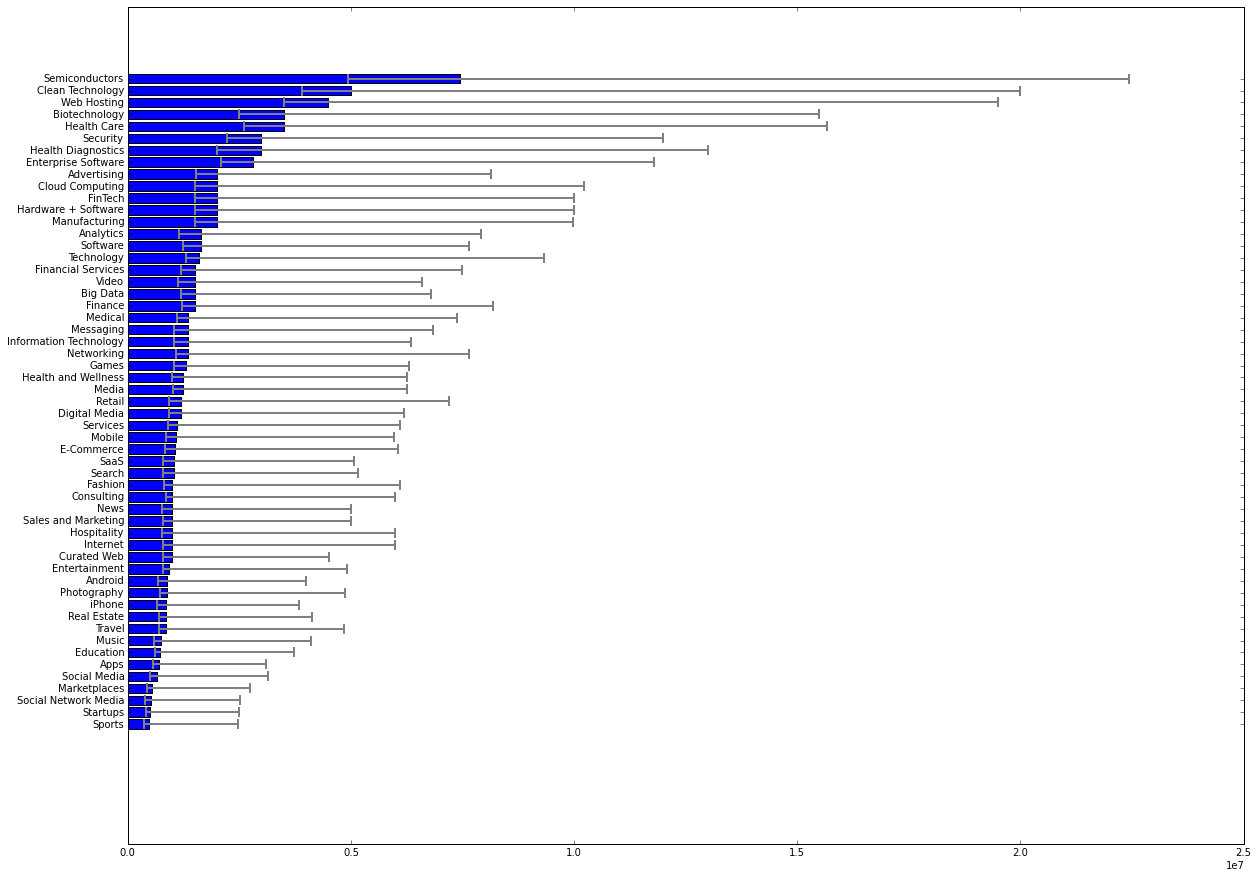

In [273]:
import operator
sorted_medians = sorted(medians.items(), key=operator.itemgetter(1))
sorted_percentile_25 = [(entry[0], percentile_25[entry[0]]) for entry in sorted_medians]
sorted_percentile_75 = [(entry[0], percentile_75[entry[0]]) for entry in sorted_medians]

error = [[entry[1] for entry in sorted_percentile_25], [entry[1] for entry in sorted_percentile_75]] 
plt.figure(figsize=(20,15))
plt.barh(range(len(medians)), [entry[1] for entry in sorted_medians], xerr=error,
       error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2), align='center');
plt.yticks(range(len(medians)),  [entry[0] for entry in sorted_medians]);

Well, we see that the standard deviations are quite large! =/

##What are we predicting?

In [274]:
median_cat_markets = {k: np.median(v) for k, v in cat_funds.iteritems()}

In [275]:
clean_rounds_df

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,funding_above_average
1,/organization/-fame,#fame,{Media},Media,IND,NaN,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,2015-01,2015-Q1,2015,10000000,True
2,/organization/hashoff,#HASHOFF,"{Social Media, Digital Media, Internet}",Digital Media,USA,CO,Denver,Denver,/funding-round/669d6203c0374e6cf0e8d10f75ba0b8a,debt_financing,NaN,2014-12-08,2014-12,2014-Q4,2014,455000,False
3,/organization/hashoff,#HASHOFF,"{Social Media, Digital Media, Internet}",Digital Media,USA,CO,Denver,Denver,/funding-round/889482c82e762d06c02a1dfa8fb41ccf,debt_financing,NaN,2015-08-11,2015-08,2015-Q3,2015,500000,False
4,/organization/waywire,#waywire,"{Social Media, News, Entertainment}",News,USA,NY,New York City,New York,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,2012-06,2012-Q2,2012,1750000,True
5,/organization/tv-communications,&TV Communications,{Games},Games,USA,CA,Los Angeles,Los Angeles,/funding-round/59a3669a64e39360c2b939300bcda162,venture,NaN,2010-09-23,2010-09,2010-Q3,2010,3000000,True
6,/organization/tv-communications,&TV Communications,{Games},Games,USA,CA,Los Angeles,Los Angeles,/funding-round/86d22afc65107b6941e6c43c671ecbb8,venture,NaN,2010-06-04,2010-06,2010-Q2,2010,1000000,False
7,/organization/rock-your-paper,'Rock' Your Paper,{Education},Publishing,EST,NaN,Tallinn,Tallinn,/funding-round/f06b420775f7cb6c1541a9db526534bb,seed,NaN,2012-08-09,2012-08,2012-Q3,2012,40000,False
9,/organization/caravelo,( caravelo (,{Information Technology},Online Travel,ESP,NaN,Barcelona,Barcelona,/funding-round/618c0949ee56f6e171678c4e03b14e30,venture,NaN,2015-07-22,2015-07,2015-Q3,2015,1089811,True
10,/organization/in-touch-network,(In)Touch Network,"{Mobile, E-Commerce, Apps, iPhone, Music}",Electronics,GBR,NaN,London,London,/funding-round/33c3f135f05d7b734b8d7b7c8ae82647,seed,NaN,2011-04-01,2011-04,2011-Q2,2011,1500000,True
11,/organization/red,(RED),{},Nonprofits,USA,NY,New York City,New York,/funding-round/1812d07fdffd519dd470ee05608286f8,secondary_market,NaN,2000-03-05,2000-03,2000-Q1,2000,2323,False


In [276]:
clean_rounds_df['funding_above_average'] = clean_rounds_df[['company_market','raised_amount_usd']].apply(lambda row: row['raised_amount_usd'] >= median_cat_markets[row['company_market']], axis=1)

In [296]:
#dummy_vars = clean_rounds_df['company_category_list'].apply(lambda row: ','.join(list(row))).str.get_dummies(sep=',')
dummy_vars = pd.get_dummies(clean_rounds_df['company_country_code'])
print dummy_vars.columns
cols_to_fit = ['funding_above_average']
training_data = clean_rounds_df[cols_to_fit]
training_data = training_data.join(dummy_vars)
training_data['intercept'] = 1.0

Index([u'ARE', u'ARG', u'AUS', u'AUT', u'BEL', u'BGR', u'BRA', u'CAN', u'CHE',
       u'CHL', u'CHN', u'DEU', u'DNK', u'ESP', u'EST', u'FIN', u'FRA', u'GBR',
       u'HKG', u'IDN', u'IND', u'IRL', u'ISR', u'ITA', u'JPN', u'KOR', u'MEX',
       u'MYS', u'NLD', u'NOR', u'NZL', u'POL', u'PRT', u'RUS', u'SGP', u'SWE',
       u'TUR', u'USA', u'ZAF'],
      dtype='object')


In [306]:
training_cols = training_data.columns[2:]
print training_data.columns[2:]

logit = sm.Logit(training_data['funding_above_average'], training_data[training_cols])

# fit the model
result = logit.fit(maxiter=75)

Index([      u'ARG',       u'AUS',       u'AUT',       u'BEL',       u'BGR',
             u'BRA',       u'CAN',       u'CHE',       u'CHL',       u'CHN',
             u'DEU',       u'DNK',       u'ESP',       u'EST',       u'FIN',
             u'FRA',       u'GBR',       u'HKG',       u'IDN',       u'IND',
             u'IRL',       u'ISR',       u'ITA',       u'JPN',       u'KOR',
             u'MEX',       u'MYS',       u'NLD',       u'NOR',       u'NZL',
             u'POL',       u'PRT',       u'RUS',       u'SGP',       u'SWE',
             u'TUR',       u'USA',       u'ZAF', u'intercept'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.672644
         Iterations 8


In [303]:
print result.summary()

                             Logit Regression Results                            
Dep. Variable:     funding_above_average   No. Observations:                80840
Model:                             Logit   Df Residuals:                    80801
Method:                              MLE   Df Model:                           38
Date:                   Thu, 10 Dec 2015   Pseudo R-squ.:                 0.02676
Time:                           12:19:38   Log-Likelihood:                -54377.
converged:                          True   LL-Null:                       -55871.
                                           LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ARG           -1.1172      0.281     -3.978      0.000        -1.668    -0.567
AUS            0.2828      0.245      1.155      0.248        -0.197     0.762
AUT            0.0752      0

In [279]:
country_dump = [row['company_country_code'] for index, row in rounds_df.iterrows()]

In [280]:
country_ctr = Counter(country_dump)

In [523]:
print len(country_ctr)
top_countries = country_ctr.most_common(40)
print top_countries
top_country_list = [entry for entry, num in top_countries if pd.notnull(entry)]
print top_country_list

136
[(u'USA', 67188), (nan, 6710), (u'GBR', 5487), (u'CAN', 2854), (u'CHN', 2561), (u'DEU', 2014), (u'IND', 1913), (u'FRA', 1511), (u'ISR', 1476), (u'ESP', 1158), (u'AUS', 683), (u'NLD', 665), (u'SGP', 660), (u'IRL', 656), (u'BRA', 653), (u'RUS', 652), (u'SWE', 593), (u'JPN', 590), (u'ITA', 546), (u'KOR', 495), (u'CHE', 482), (u'CHL', 440), (u'FIN', 395), (u'DNK', 382), (u'ARG', 317), (u'BEL', 287), (u'HKG', 265), (u'TUR', 254), (u'MEX', 214), (u'AUT', 193), (u'BGR', 191), (u'NOR', 190), (u'POL', 190), (u'NZL', 142), (u'PRT', 126), (u'IDN', 122), (u'EST', 121), (u'ARE', 107), (u'MYS', 103), (u'ZAF', 101)]
[u'USA', u'GBR', u'CAN', u'CHN', u'DEU', u'IND', u'FRA', u'ISR', u'ESP', u'AUS', u'NLD', u'SGP', u'IRL', u'BRA', u'RUS', u'SWE', u'JPN', u'ITA', u'KOR', u'CHE', u'CHL', u'FIN', u'DNK', u'ARG', u'BEL', u'HKG', u'TUR', u'MEX', u'AUT', u'BGR', u'NOR', u'POL', u'NZL', u'PRT', u'IDN', u'EST', u'ARE', u'MYS', u'ZAF']


In [295]:
mask = clean_rounds_df['company_country_code'].apply(lambda x: x in top_country_list)
clean_rounds_df = clean_rounds_df[mask]
print len(clean_rounds_df)

80840


## Cross-Validation

In [488]:
clean_rounds_df = rounds_df[pd.notnull(rounds_df['company_category_list'])]
clean_rounds_df = clean_rounds_df[pd.notnull(clean_rounds_df['company_market'])]
clean_rounds_df = clean_rounds_df[pd.notnull(clean_rounds_df['company_country_code'])]
clean_rounds_df = clean_rounds_df[pd.notnull(clean_rounds_df['raised_amount_usd'])]

new_category_lists = rounds_df.apply(lambda row: set.intersection(set(row['company_category_list']), category_list), axis=1)
clean_rounds_df['company_category_list'] = new_category_lists


clean_rounds_df['funding_above_average'] = clean_rounds_df[['company_market','raised_amount_usd']].apply(
    lambda row: row['raised_amount_usd'] >= median_cat_markets[row['company_market']], axis=1)



In [498]:
def make_dummy(data_df, column, num_to_keep):
    
    column_dump = data_df[column]
    column_ctr = Counter(column_dump)
    top_entries = column_ctr.most_common(num_to_keep)
    
    top_entries_list = [entry for entry, num in top_entries if pd.notnull(entry)]
    
    
    mask = data_df[column].apply(lambda row: row not in top_entries_list)
    data_df_copy = data_df.copy()
    data_df_copy.loc[mask, column] = 'Other'
    
    dummy_vars = pd.get_dummies(data_df_copy[column])
    dummy_vars['intercept'] = 1.0
    cols = dummy_vars.columns[1:]
    dummy_vars = dummy_vars.reset_index(level = 0, drop=True)
    return dummy_vars[cols];

In [519]:
#scores = cross_validation.cross_val_score(sm.Logit(), training_data, training_target, cv=5)
#print scores
from sklearn.cross_validation import KFold

errors = {}
    
for num_to_keep in range(5,150,5):
    
    new_data_df = make_dummy(clean_rounds_df, 'company_country_code',num_to_keep)
    training_target = clean_rounds_df['funding_above_average']
    
    X_train, X_test, y_train, y_test = train_test_split(
    new_data_df, training_target, test_size=0.25, random_state=42)
    
    X_train = X_train.reset_index(level=0, drop=True)
    y_train = y_train.reset_index(level=0, drop=True)
    
    total_rows = len(X_train)
    kf = KFold(total_rows, n_folds=5)
    errors[num_to_keep] = []

    for train_index, test_index in kf:
        X_train_sub, X_test_cv = X_train.loc[train_index], X_train.loc[test_index]
        y_train_sub, y_test_cv = y_train.loc[train_index], y_train.loc[test_index]
        logit = sm.Logit(np.asarray(y_train_sub), np.asarray(X_train_sub))
        result = logit.fit(maxiter=1000, missing='drop', method='bfgs')
        cv_predictions = result.predict(X_test_cv)
        errors[num_to_keep].append(np.sqrt(sum((cv_predictions - y_test_cv)**2))/float(len(cv_predictions)))


Optimization terminated successfully.
         Current function value: 0.682026
         Iterations: 45
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 0.681372
         Iterations: 45
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 0.681448
         Iterations: 46
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.681782
         Iterations: 46
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.681545
         Iterations: 46
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.677863
         Iterations: 79
         Function evaluations: 80
  

In [520]:
error_avgs = {}
for k,v in errors.iteritems():
    error_avgs[k] = np.mean(v)

In [521]:
min(error_avgs, key=error_avgs.get)

100

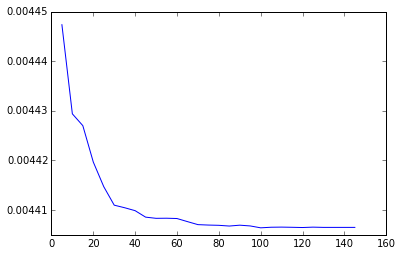

In [522]:
num_fit_countries = []
averages = []

for k,v in sorted(error_avgs.iteritems()):
    num_fit_countries.append(k)
    averages.append(v)

plt.plot(num_fit_countries, averages)

In [541]:
num_to_keep = 100
new_data_df = make_dummy(clean_rounds_df, 'company_country_code',num_to_keep)
training_target = clean_rounds_df['funding_above_average']

X_train, X_test, y_train, y_test = train_test_split(
new_data_df, training_target, test_size=0.25, random_state=42)

X_train = X_train.reset_index(level=0, drop=True)
y_train = y_train.reset_index(level=0, drop=True)

total_rows = len(X_train)
kf = KFold(total_rows, n_folds=5)
errors[num_to_keep] = []

        
logit_train = sm.Logit(np.asarray(y_train), np.asarray(X_train))
result_train = logit_train.fit(maxiter=1000, missing='drop', method='bfgs')
predictions_train = result_train.predict(X_train)
error_train = np.sqrt(sum((predictions_train - y_train)**2))/float(len(predictions_train))
print error_train
print result_train.summary()

predictions_test = result_train.predict(X_test)

error_test = np.sqrt(sum((predictions_test - y_test)**2))/float(len(predictions_test))
print error_test
print result_test.summary()
print np.exp(result_test.params)

Optimization terminated successfully.
         Current function value: 0.669797
         Iterations: 505
         Function evaluations: 507
         Gradient evaluations: 507
0.00196827347821
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                61794
Model:                          Logit   Df Residuals:                    61693
Method:                           MLE   Df Model:                          100
Date:                Thu, 10 Dec 2015   Pseudo R-squ.:                 0.03166
Time:                        19:21:51   Log-Likelihood:                -41389.
converged:                       True   LL-Null:                       -42743.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.9

ValueError: need covariance of parameters for computing (unnormalized) covariances

In [556]:
np.exp(-.09)

0.91393118527122819

In [536]:
print np.exp(result_train.params)

[  3.97953030e-01   2.06066098e+00   1.48326024e+00   1.11692479e+00
   1.71310449e-02   1.80138143e+00   1.93557929e-01   6.38857383e-05
   3.60237788e-02   1.71310449e-02   7.63171315e+01   1.18697109e+01
   9.31629294e-01   6.31551012e-01   1.66911282e+00   2.33140550e+00
   5.45535925e-02   7.30245832e+00   3.60237788e-02   3.63548664e-01
   4.78006360e-03   1.95982070e+01   1.05298899e+00   9.30559679e-01
   1.90583257e+00   1.50619645e+00   2.35303064e-03   9.87429194e-01
   6.76010728e-01   3.61940601e-01   1.60242978e+00   2.86455580e+00
   1.45296164e+00   3.08345709e-01   1.20549263e+00   3.70716087e-01
   6.65082395e-03   1.52121024e+00   2.71144684e-01   4.97353717e-01
   2.03156748e+00   2.53184458e+00   9.31979338e-01   1.18910507e+00
   2.94430137e+00   5.45111321e-01   7.63171315e+01   7.22146457e-01
   2.50150838e+00   4.36868683e+02   1.22206464e+00   1.13595451e-01
   9.99113589e-01   1.64169448e-01   1.13595451e-01   3.19266419e-01
   1.34667768e+00   1.97842830e-01

In [538]:
column_dump = clean_rounds_df['company_country_code']
column_ctr = Counter(column_dump)
top_entries = column_ctr.most_common(100)
top_entries_list = [entry for entry, num in top_entries if pd.notnull(entry)]

In [553]:
[(i, top_entries_list[i]) for i in range(len( top_entries_list))]

[(0, u'USA'),
 (1, u'GBR'),
 (2, u'CAN'),
 (3, u'CHN'),
 (4, u'IND'),
 (5, u'FRA'),
 (6, u'ISR'),
 (7, u'DEU'),
 (8, u'ESP'),
 (9, u'AUS'),
 (10, u'RUS'),
 (11, u'IRL'),
 (12, u'SGP'),
 (13, u'SWE'),
 (14, u'NLD'),
 (15, u'ITA'),
 (16, u'BRA'),
 (17, u'JPN'),
 (18, u'CHL'),
 (19, u'KOR'),
 (20, u'CHE'),
 (21, u'FIN'),
 (22, u'ARG'),
 (23, u'DNK'),
 (24, u'BEL'),
 (25, u'HKG'),
 (26, u'TUR'),
 (27, u'MEX'),
 (28, u'BGR'),
 (29, u'NOR'),
 (30, u'POL'),
 (31, u'AUT'),
 (32, u'NZL'),
 (33, u'EST'),
 (34, u'PRT'),
 (35, u'COL'),
 (36, u'MYS'),
 (37, u'ARE'),
 (38, u'CZE'),
 (39, u'PER'),
 (40, u'ZAF'),
 (41, u'TWN'),
 (42, u'GRC'),
 (43, u'IDN'),
 (44, u'LVA'),
 (45, u'UKR'),
 (46, u'THA'),
 (47, u'PHL'),
 (48, u'HUN'),
 (49, u'NGA'),
 (50, u'KEN'),
 (51, u'LUX'),
 (52, u'LTU'),
 (53, u'ROU'),
 (54, u'EGY'),
 (55, u'CYP'),
 (56, u'SVK'),
 (57, u'ISL'),
 (58, u'JOR'),
 (59, u'LBN'),
 (60, u'SVN'),
 (61, u'URY'),
 (62, u'PAK'),
 (63, u'VEN'),
 (64, u'VNM'),
 (65, u'BGD'),
 (66, u'SRB'),
 (67,

In [547]:
confidence_intervals = np.exp(result_train.conf_int())

differences = [(i, confidence_intervals[i][0], confidence_intervals[i][1], confidence_intervals[i][1] - confidence_intervals[i][0]) for i in range(len(confidence_intervals))]


In [551]:
sorted(differences, key=lambda x: x[3])

[(16, 0.023814906357534752, 0.12496771620858757, 0.10115280985105282),
 (75, 0.020763180224384409, 0.33294723677081917, 0.31218405654643477),
 (61, 0.14603265935612114, 0.58037395516279267, 0.43434129580667152),
 (0, 0.21791228628434992, 0.72674476942960764, 0.50883248314525775),
 (94, 0.060859261564079663, 0.58521670314470764, 0.52435744158062803),
 (57, 0.063519590322974689, 0.61621595881731883, 0.55269636849434411),
 (100, 0.34025559816157674, 0.91075650232814154, 0.57050090416656474),
 (29, 0.16683766023769253, 0.78520040865261764, 0.61836274841492511),
 (77, 0.21062885835602912, 0.8396733699653699, 0.62904451160934083),
 (19, 0.16505891067581108, 0.80073005605972802, 0.635671145383917),
 (45, 0.31313022482182262, 0.94895455219519498, 0.63582432737337236),
 (28, 0.40287479577248619, 1.1343238887889215, 0.73144909301643535),
 (35, 0.14790202972310895, 0.92919899805690154, 0.78129696833379259),
 (85, 0.023175219660074027, 0.89806403031539894, 0.87488881065532487),
 (55, 0.09797839113